Projeto IC
====

Etapas
1. Coleta
> Carregamento dos arquivos texto contendo as respostas. Formato dos arquivos.txt descrito em README.
> Cada documento será carregado em um DataFrame no formato ['nota','resposta']
2. Pré-processamento
> Criação de um dicionário de sinônimos baseado no gabarito no formato [key,[values]], onde key=termo do gabarito, e [values] lista de sinônimos de key. 
> Criação de um thesaurus com palavras referentes ao tema tratado.
> Adequação textual das respostas:
> * Remoção de pontuação e caracteres especiais
> * Remoção de stopwords
> * Dicionário de sinônimos: construção e substituição dos sinônimos pela chave (key) do dicionário;
> * substituição dos termos específicos (thesaurus);
3. Processamento
> Avaliar a similaridade dos textos de acordo com métricas baseada em:
> 1. String
> 2. Fuzzy
> 3. Termos
    * Transformação dos textos para: Tokenização e representação dos textos para a abordagem BOW
    * Comparar segundo métricas cosseno e distância euclideana

4. Análise e validação
> A comparação entre as notas reais e as calculadas por cada uma das medidas na etapa 3 será validada pelo **Teste T**

### Etapa 1: COLETA

In [1]:
import os
from itertools import islice
import pandas as pd

path_resultados="/home/leonard/Faculdades/ESTACIO/Projetos/IC/2017-2018/Luiz/Resultados"
path="/home/leonard/Faculdades/ESTACIO/Projetos/IC/2017-2018/Luiz/Dados/SistMicroprocessadores"
def encontraArquivosEmPastaRecursivamente(pasta, extensao):
    arquivosTxt = []
    caminhoAbsoluto = os.path.abspath(pasta)
    for pastaAtual, subPastas, arquivos  in os.walk(caminhoAbsoluto):
        arquivosTxt.extend([os.path.join(pastaAtual,arquivo) for arquivo in arquivos if arquivo.endswith('.txt')])
    return arquivosTxt


arquivos = encontraArquivosEmPastaRecursivamente(path, '.txt')

'''
Padrão do arquivo
1a linha: <nota atribuída> de <valor da questão>
2a linha: em branco
3a linha em diante: resposta
'''

notas_respostas=[]
corpus_respostas=[]
for a in arquivos:
    arq = open(a,'r')
    with open(a) as lines:
        #lines = arq.readlines()
        lines = [lines.rstrip("\n") for lines in arq] #retirar o caracter de fim de linha
        # then skip the next 2
        #notas_respostas=lines.split(' ',1)[0] #pegar a 1a palavra da 1a linha, que é a nota 
        notas_respostas.append(lines[0].split(' ',1)[0])
        for line in islice(lines, 3): #Começar a ler o arquivo da 3a linha
            pass
        corpus_respostas.append(line)
    arq.close()

# Inserir as notas e as respostas no DataFrame
df = pd.DataFrame({'Notas':notas_respostas,'Respostas':corpus_respostas})

gabarito = 'O desvio no programa ocorre sempre que o programa sai da sequência normal de execução. Existem basicamente dois tipos de desvio: desvio incondicional e desvio condicional. O desvio incondicional ocorre quando o programa sai da sequência normal de execução e é desviado para outro ponto da memória de programa independente de qualquer condição; o desvio ocorre sem depender de nada. Um exemplo de um desvio incondicional é aquele provocado pela instrução GOTO. No desvio condicional, uma condição deve ser satisfeita para que o desvio ocorra. Normalmente uma determinada condição é testada e, se o teste for validado, ocorre o desvio.'
nota = [2]
dfR = pd.DataFrame({'Notas':[2.0],'Respostas':gabarito})

#Inserindo a resposta na posição 0 (zero)
#df.loc[-1]=[2,gabarito]
#df.index = df.index + 1  # shifting index
#df = df.sort_index()  # sorting by index

#print(df['Respostas'][0]) #Imprimir a resposta armazenada na 1a posição do DataFrame
print(df)

   Notas                                          Respostas
0    0.5  DSC - Controlador Digital de Sinais. DSP - Pro...
1      0  watchdog timer: esse temporizador reinicializa...
2    1.0  Um desvio em um programa ocorre quando alguma ...
3    0.5  Incondicional -> ocorre independente de qualqu...
4    1.7  Ocorre quando um programa sai da sua sequencia...
5    1.0  Desvio condicional e incondicional. Desvio inc...
6    2.0  O desvio no programa ocorre sempre que o progr...
7    0.5  Desvio acontece quando há necessidade do opera...
8    1.8  O desvio de programa ocorre sempre que o progr...
9    1.8  O desvio no programa ocorre sempre que o progr...
10   1.8  O desvio ocorre sempre que o programa sai de s...
11   1.5  Quando ocorre um desvio, a instrução que já fo...
12   0.9  Quando da problema no registrador (program cou...
13   2.0  O desvio no programa ocorre sempre que o progr...
14   0.2  Ocorre quando o programa sai da frequencia nom...


0.655608214849921


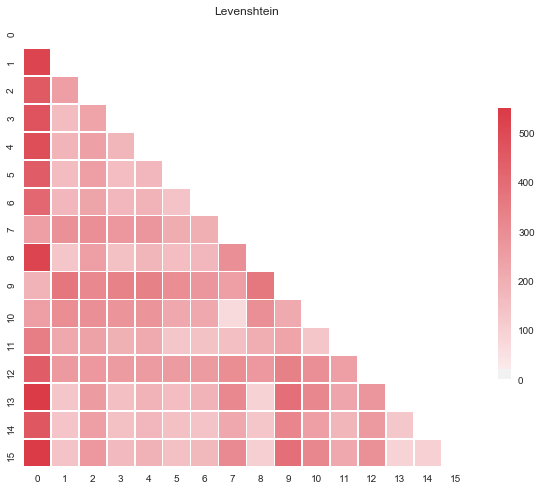

In [2]:
from similarity2 import *

#Merge dataframes
dfMerged2 = pd.concat([dfR,df],axis=0).reset_index(drop=True)
#print(dfMerged)
lev=sim(levenshtein,dfMerged2['Respostas'])
i=0
j=6
#print(lev)
ratio = lev[i][j] / (max(len(dfMerged2['Respostas'][i]),len(dfMerged2['Respostas'][j])))
print(ratio)
grafico_similaridade(sim(levenshtein,dfMerged2['Respostas']),"Levenshtein")

### Etapa 2: PRÉ-PROCESSAMENTO
* **Case folding**

In [3]:
def case_folding(s):
    return ' '.join([w.lower() for w in s.split(' ')])


print(dfR.head())
dfR['Respostas']=case_folding(dfR['Respostas'][0])
print(dfR.head())

print(df)    
for index,row in df.iterrows(): #Respostas
    row['Respostas']=case_folding(row['Respostas'])
    
print(df) 

   Notas                                          Respostas
0    2.0  O desvio no programa ocorre sempre que o progr...
   Notas                                          Respostas
0    2.0  o desvio no programa ocorre sempre que o progr...
   Notas                                          Respostas
0    0.5  DSC - Controlador Digital de Sinais. DSP - Pro...
1      0  watchdog timer: esse temporizador reinicializa...
2    1.0  Um desvio em um programa ocorre quando alguma ...
3    0.5  Incondicional -> ocorre independente de qualqu...
4    1.7  Ocorre quando um programa sai da sua sequencia...
5    1.0  Desvio condicional e incondicional. Desvio inc...
6    2.0  O desvio no programa ocorre sempre que o progr...
7    0.5  Desvio acontece quando há necessidade do opera...
8    1.8  O desvio de programa ocorre sempre que o progr...
9    1.8  O desvio no programa ocorre sempre que o progr...
10   1.8  O desvio ocorre sempre que o programa sai de s...
11   1.5  Quando ocorre um desvio, a ins

* **Remoção de pontuação e caracteres especiais**

In [4]:
#Retirar pontuação
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

print(dfR.to_string())
dfR['Respostas']=strip_punctuation(dfR['Respostas'][0])
print(dfR.to_string())

print(df.head())    
for index,row in df.iterrows(): #Respostas
    row['Respostas']=strip_punctuation(row['Respostas'])
    
print(df.head())    

   Notas                                          Respostas
0    2.0  o desvio no programa ocorre sempre que o progr...
   Notas                                          Respostas
0    2.0  o desvio no programa ocorre sempre que o progr...
  Notas                                          Respostas
0   0.5  dsc - controlador digital de sinais. dsp - pro...
1     0  watchdog timer: esse temporizador reinicializa...
2   1.0  um desvio em um programa ocorre quando alguma ...
3   0.5  incondicional -> ocorre independente de qualqu...
4   1.7  ocorre quando um programa sai da sua sequencia...
  Notas                                          Respostas
0   0.5  dsc  controlador digital de sinais dsp  proces...
1     0  watchdog timer esse temporizador reinicializa ...
2   1.0  um desvio em um programa ocorre quando alguma ...
3   0.5  incondicional  ocorre independente de qualquer...
4   1.7  ocorre quando um programa sai da sua sequencia...


In [5]:
#Retirar caracteres especiais
import unicodedata
import re
def remove_special_chars(text):
    nfkd = unicodedata.normalize('NFKD', text)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])
    return re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', palavraSemAcento)

print(dfR.head())
dfR['Respostas']=remove_special_chars(dfR['Respostas'][0])
print(dfR.head())

print(df.head())    
for index,row in df.iterrows(): #Respostas
    row['Respostas']=remove_special_chars(row['Respostas'])
    
print(df.head()) 

   Notas                                          Respostas
0    2.0  o desvio no programa ocorre sempre que o progr...
   Notas                                          Respostas
0    2.0  o desvio no programa ocorre sempre que o progr...
  Notas                                          Respostas
0   0.5  dsc  controlador digital de sinais dsp  proces...
1     0  watchdog timer esse temporizador reinicializa ...
2   1.0  um desvio em um programa ocorre quando alguma ...
3   0.5  incondicional  ocorre independente de qualquer...
4   1.7  ocorre quando um programa sai da sua sequencia...
  Notas                                          Respostas
0   0.5  dsc  controlador digital de sinais dsp  proces...
1     0  watchdog timer esse temporizador reinicializa ...
2   1.0  um desvio em um programa ocorre quando alguma ...
3   0.5  incondicional  ocorre independente de qualquer...
4   1.7  ocorre quando um programa sai da sua sequencia...


* **Remoção de stopwords**

In [6]:
import nltk
stopwords = nltk.corpus.stopwords.words('portuguese')

def remove_stopwords(text):
    return ' '.join([w.lower() for w in text.split() if w not in stopwords])

print(dfR.head())
dfR['Respostas']=remove_stopwords(dfR['Respostas'][0])
print(dfR.head())

print(df.head())    
for index,row in df.iterrows(): #Respostas
    row['Respostas']=remove_stopwords(row['Respostas'])
    
print(df.head())    

   Notas                                          Respostas
0    2.0  o desvio no programa ocorre sempre que o progr...
   Notas                                          Respostas
0    2.0  desvio programa ocorre sempre programa sai seq...
  Notas                                          Respostas
0   0.5  dsc  controlador digital de sinais dsp  proces...
1     0  watchdog timer esse temporizador reinicializa ...
2   1.0  um desvio em um programa ocorre quando alguma ...
3   0.5  incondicional  ocorre independente de qualquer...
4   1.7  ocorre quando um programa sai da sua sequencia...
  Notas                                          Respostas
0   0.5  dsc controlador digital sinais dsp processador...
1     0  watchdog timer temporizador reinicializa micro...
2   1.0  desvio programa ocorre alguma condicao esvio p...
3   0.5  incondicional ocorre independente qualquer fat...
4   1.7  ocorre programa sai sequencia condicao sozinho...


* **Construção do dicionário de sinônimos**

In [7]:
"""
import re
import nltk
from pysinonimos.sinonimos import Search, historic

#gabarito = ['Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.']
stopwords = nltk.corpus.stopwords.words('portuguese')

gabarito=[dfR['Respostas'][0]]

gabaritoSemPontuacao=[]
for g in gabarito: 
    gabaritoSemPontuacao.append(re.sub('[,.]', '', g)) #retirar pontuação
    
words=[]
for g in gabaritoSemPontuacao:
    words = g.lower().split() #colocar em caixa baixa e dividir sentença em termos


dicionario = dict()
#Cria dicionário com palavras do gabarito que não estão nas stopwords
for w in words: 
    if w not in stopwords:
        dicionario[w]=[]


#Cada chave do dicionário é atribuída a respectiva lista de sinônimos
for k in iter(dicionario.keys()):
    key = Search(k)
    syn = key.synonyms()
    if (isinstance(syn,list)):
        dicionario[k]=syn
     
"""

"\nimport re\nimport nltk\nfrom pysinonimos.sinonimos import Search, historic\n\n#gabarito = ['Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.']\nstopwords = nltk.corpus.stopwords.words('portuguese')\n\ngabarito=[dfR['Respostas'][0]]\n\ngabaritoSemPontuacao=[]\nfor g in gabarito: \n    gabaritoSemPontuacao.append(re.sub('[,.]', '', g)) #retirar pontuação\n    \nwords=[]\nfor g in gabaritoSemPontuacao:\n    words = g.lower().split() #colocar em caixa baixa e dividir sentença em termos\n\n\ndicionario = dict()\n#Cria dicionário com palavras do gabarito que não estão nas stopwords\nfor w in words: \n    if w not in stopwords:\n        dicionario[w]=[]\n\n\n#Cada chave do dicionário é atribuída a respectiva lista de sinônimos\nfor k in iter(dicionario.keys

* **Dicionário de sinônimos: <u>construção</u> e substituição dos sinônimos pela chave (key) do dicionário**


In [8]:
'''
Parâmetros:
values -> dicionário
searchFor - > termo de pesquisa 

Retorno:
a chave correspondente ao parâmetro especificado em searchFor
'''
def search(values, searchFor):
    for k in values:
        for v in values[k]:
            if searchFor in v:
                return k
    return None 

print(df.head())
'''
#Procura em cada resposta a existência do termo como valor no dicionário. 
#Caso exista, troca o termo sinônimo pela chave
normalizedString = []
for index,r in df.iterrows():
    sentence = []
    words = r['Respostas'].lower().split()
    for w in words:
        if w not in stopwords:
            syn =search(dicionario,w)
            if w != syn and syn!= None:
                sentence.append(syn)
            else:
                sentence.append(w)

    r['Respostas']=' '.join([str(x) for x in sentence])
    #normalizedString.append(' '.join([str(x) for x in sentence]))

print(df.head())
'''

  Notas                                          Respostas
0   0.5  dsc controlador digital sinais dsp processador...
1     0  watchdog timer temporizador reinicializa micro...
2   1.0  desvio programa ocorre alguma condicao esvio p...
3   0.5  incondicional ocorre independente qualquer fat...
4   1.7  ocorre programa sai sequencia condicao sozinho...


"\n#Procura em cada resposta a existência do termo como valor no dicionário. \n#Caso exista, troca o termo sinônimo pela chave\nnormalizedString = []\nfor index,r in df.iterrows():\n    sentence = []\n    words = r['Respostas'].lower().split()\n    for w in words:\n        if w not in stopwords:\n            syn =search(dicionario,w)\n            if w != syn and syn!= None:\n                sentence.append(syn)\n            else:\n                sentence.append(w)\n\n    r['Respostas']=' '.join([str(x) for x in sentence])\n    #normalizedString.append(' '.join([str(x) for x in sentence]))\n\nprint(df.head())\n"

Etapa3: PROCESSAMENTO
===

> Avaliar a similaridade dos textos de acordo com métricas baseada em:
1. Edit-based
    1. Levenshtein
        * 0,+inf, onde: 0(similar),+inf (dissimilar)
        * The maximum Levenshtein distance (all chars are different) is max(string1.length, string2.length)
    2. Damerau-Levenshtein
        *
        * Similar to Levenshtein distance, but additionally considers transposed characters  
    3. Jaro
        * 0,1, onde 0 (dissimilar) e 1 (similar)
    
        

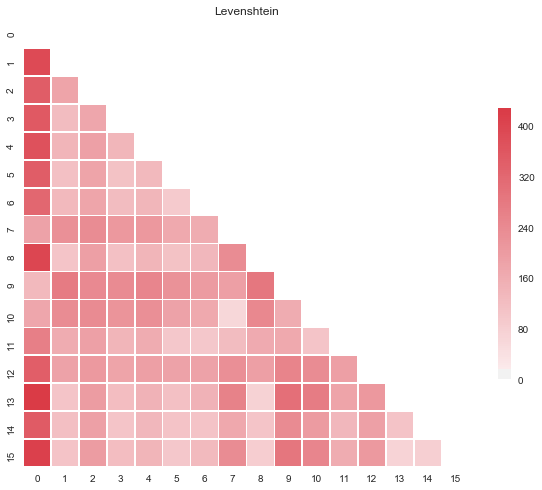

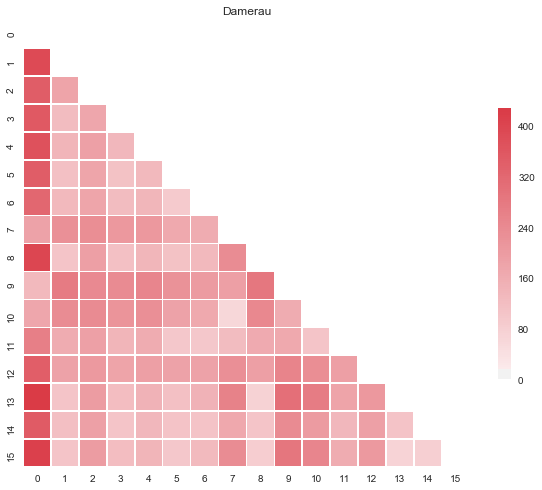

[[       nan 0.61297588 0.65655022 0.65515724 0.6461208  0.62412357
  0.6509949  0.77671158 0.59524508 0.78776395 0.76925199 0.68134037
  0.68377505 0.56861913 0.65888103 0.55483821]]


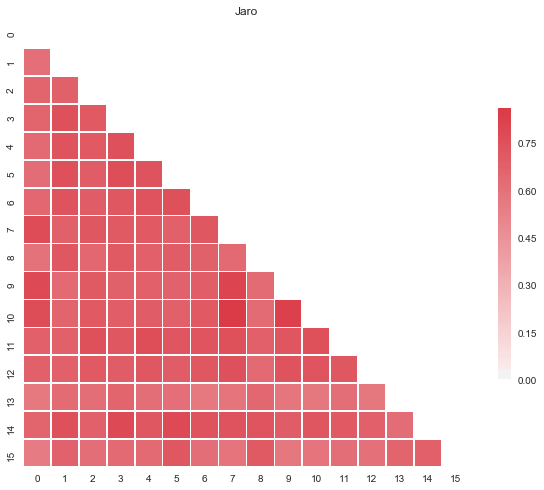

In [9]:
from similarity import *
import math

#Merge dataframes
dfMerged = pd.concat([dfR,df],axis=0).reset_index(drop=True)
#print(dfMerged)

i=0
j=6
#print(lev)
#ratio = lev[i][j] / (max(len(dfMerged['Respostas'][i]),len(dfMerged['Respostas'][j])))
#print(ratio)

#LEVENSHTEIN
lev=sim(levenshtein,dfMerged['Respostas'])
grafico_similaridade(lev,"Levenshtein")
lev[0][0]=0 


#DEMERAU
dem=sim(damerau,dfMerged['Respostas'])
#print(dem[0:1])
grafico_similaridade(dem,"Damerau")
dem[0][0]=0

#JARO
jar=sim(jaro,dfMerged['Respostas'])
print(jar[0:1])
grafico_similaridade(jar,"Jaro")
jar[0][0]=1




#print(sim(jaro_winkler,dfMerged['Respostas']))
#grafico_similaridade(sim(jaro_winkler,dfMerged['Respostas']),"Jaro Winkler")

#print(sim(hamming,dfMerged['Respostas']))
#grafico_similaridade(sim(hamming,dfMerged['Respostas']),"Hamming")


* Avaliar a similaridade dos textos de acordo com métricas baseada em:
    * Fuzzy **(implementar)**

* Avaliar a similaridade dos textos de acordo com métricas baseada em:
    * Termos

In [10]:
stemmer = nltk.stem.RSLPStemmer()

for index,row in dfMerged.iterrows(): #Respostas
    line = row['Respostas']
    stemmedLine=[]
    for word in line.split():
        stemmedLine.append(stemmer.stem(word))
    #print(' '.join(stemmedLine))
    #print("\n\n")
    row['Respostas']=' '.join(stemmedLine)

print(dfMerged)        

   Notas                                          Respostas
0      2  desvi program ocorr sempr program sai sequenc ...
1    0.5  dsc control digit sinal dsp process digit sina...
2      0  watchdog tim temporiz reinicializ microcontrol...
3    1.0  desvi program ocorr algum condica esvi prev oc...
4    0.5  incondic ocorr independ qualqu fat ness cas oc...
5    1.7  ocorr program sai sequenc condica so desvi inc...
6    1.0  desvi condic incondic desvi incondic ocorr qua...
7    2.0  desvi program ocorr sempr program sai sequenc ...
8    0.5  desvi acontec ha necess oper interv program po...
9    1.8  desvi program ocorr sempr program sai sequenc ...
10   1.8  desvi program ocorr sempr program sai sequenc ...
11   1.8  desvi ocorr sempr program sai sequenc norm exe...
12   1.5  ocorr desvi instruca ja prev busc sistem pipel...
13   0.9  problem registr progr count control program mi...
14   2.0  desvi program ocorr sempr program sai sequenc ...
15   0.2  ocorr program sai frequenc nom

In [11]:
def pre_processamento(lst):
    item=[]
    for idx,val in enumerate(lst):
        val=val.lower()
        s=strip_punctuation(val)
        s=remove_stopwords(val)
        s=remove_special_chars(val)

        item.append(s)
    return item

In [12]:
from nltk import ngrams 
def word_grams(words, min=1, max=3):
    s = []
    if isinstance(words,str): 
        words=words.split()
    
    for n in range(min, max+1):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

# Bag of words pacote sklearn
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# PRÉ-PROCESSAMENTO
#dfMerged['Respostas']=pre_processamento(dfMerged['Respostas'])
#print(respostas)

vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,  ngram_range=(1,2), stop_words = stopwords, max_features = 5000) 
train_data_features = vectorizer.fit_transform(dfMerged['Respostas'])
train_data_features = train_data_features.toarray()



vocab = vectorizer.get_feature_names()
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

print(len(vocab))
# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

329
2 acontec
1 acontec ha
1 acontec qua
1 acord
1 acord necess
3 algum
1 algum condica
1 algum condico
1 algum problem
1 alter
1 alter destin
1 ant
1 ant ter
1 anteri
1 anteri instruca
1 apo
1 apo trat
1 apont
1 apont pc
1 assim
1 assim apo
1 atend
1 atend part
1 atual
1 atual registr
4 basic
3 basic doi
1 basic got
1 busc
1 busc sistem
2 cas
1 cas contrari
1 cas ocorr
1 cert
1 cert condico
1 cicl
1 cicl maquin
11 condic
3 condic condica
1 condic depend
3 condic desvi
1 condic funca
1 condic incondic
1 condic necessari
11 condica
4 condica desvi
3 condica dev
1 condica esvi
1 condica so
2 condica test
2 condico
1 condico desvi
1 condico ser
1 contrari
1 contrari seg
3 control
2 control digit
1 control program
1 count
1 count control
1 demand
1 demand cicl
4 depend
1 depend algum
3 depend nad
1 destin
1 destin especific
57 desvi
2 desvi acontec
1 desvi basic
9 desvi condic
5 desvi desvi
1 desvi feit
12 desvi incondic
2 desvi instruca
9 desvi ocorr
7 desvi outr
6 desvi program
3 determi

### Avaliar a similaridade do 1o registro (resposta) com os demais
> Método Cosseno

In [13]:
from gensim import corpora, models, similarities

from sklearn.metrics.pairwise import cosine_similarity

#Similaridade entre o 1 documento (que é o gabarito) e os demais
c=cosine_similarity(train_data_features[0:1],train_data_features)
dfMerged['Cosine']=pd.Series(c[0])
print(dfMerged)


   Notas                                          Respostas    Cosine
0      2  desvi program ocorr sempr program sai sequenc ...  1.000000
1    0.5  dsc control digit sinal dsp process digit sina...  0.139257
2      0  watchdog tim temporiz reinicializ microcontrol...  0.155786
3    1.0  desvi program ocorr algum condica esvi prev oc...  0.460677
4    0.5  incondic ocorr independ qualqu fat ness cas oc...  0.439550
5    1.7  ocorr program sai sequenc condica so desvi inc...  0.600266
6    1.0  desvi condic incondic desvi incondic ocorr qua...  0.724745
7    2.0  desvi program ocorr sempr program sai sequenc ...  0.918949
8    0.5  desvi acontec ha necess oper interv program po...  0.169571
9    1.8  desvi program ocorr sempr program sai sequenc ...  0.915507
10   1.8  desvi program ocorr sempr program sai sequenc ...  0.901875
11   1.8  desvi ocorr sempr program sai sequenc norm exe...  0.806415
12   1.5  ocorr desvi instruca ja prev busc sistem pipel...  0.158536
13   0.9  problem re

### Avaliar a similaridade do 1o registro (resposta) com os demais
> Distância Euclideana

In [14]:
from sklearn.metrics.pairwise import euclidean_distances

e=euclidean_distances(train_data_features[0:1],train_data_features)
dfMerged['Euclidean']=pd.Series(e[0])
#print(e)
#print(dfMerged.head())
print(dfMerged)

   Notas                                          Respostas    Cosine  \
0      2  desvi program ocorr sempr program sai sequenc ...  1.000000   
1    0.5  dsc control digit sinal dsp process digit sina...  0.139257   
2      0  watchdog tim temporiz reinicializ microcontrol...  0.155786   
3    1.0  desvi program ocorr algum condica esvi prev oc...  0.460677   
4    0.5  incondic ocorr independ qualqu fat ness cas oc...  0.439550   
5    1.7  ocorr program sai sequenc condica so desvi inc...  0.600266   
6    1.0  desvi condic incondic desvi incondic ocorr qua...  0.724745   
7    2.0  desvi program ocorr sempr program sai sequenc ...  0.918949   
8    0.5  desvi acontec ha necess oper interv program po...  0.169571   
9    1.8  desvi program ocorr sempr program sai sequenc ...  0.915507   
10   1.8  desvi program ocorr sempr program sai sequenc ...  0.901875   
11   1.8  desvi ocorr sempr program sai sequenc norm exe...  0.806415   
12   1.5  ocorr desvi instruca ja prev busc sistem 

* Distância Manhattan

In [15]:
from sklearn.metrics.pairwise import manhattan_distances

#Similaridade entre o 1 documento (que é o gabarito) e os demais
c=manhattan_distances(train_data_features[0:1],train_data_features)
dfMerged['Manhattan']=pd.Series(c[0])
print(dfMerged)

   Notas                                          Respostas    Cosine  \
0      2  desvi program ocorr sempr program sai sequenc ...  1.000000   
1    0.5  dsc control digit sinal dsp process digit sina...  0.139257   
2      0  watchdog tim temporiz reinicializ microcontrol...  0.155786   
3    1.0  desvi program ocorr algum condica esvi prev oc...  0.460677   
4    0.5  incondic ocorr independ qualqu fat ness cas oc...  0.439550   
5    1.7  ocorr program sai sequenc condica so desvi inc...  0.600266   
6    1.0  desvi condic incondic desvi incondic ocorr qua...  0.724745   
7    2.0  desvi program ocorr sempr program sai sequenc ...  0.918949   
8    0.5  desvi acontec ha necess oper interv program po...  0.169571   
9    1.8  desvi program ocorr sempr program sai sequenc ...  0.915507   
10   1.8  desvi program ocorr sempr program sai sequenc ...  0.901875   
11   1.8  desvi ocorr sempr program sai sequenc norm exe...  0.806415   
12   1.5  ocorr desvi instruca ja prev busc sistem 

### Diversas Métricas em:
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [16]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('minkowski')
dp=dist.pairwise(train_data_features)
print(dp[0:1])

[[ 0.         17.8325545  18.22086716 15.55634919 15.74801575 14.35270009
  12.80624847  7.48331477 17.43559577  7.34846923  8.24621125 11.13552873
  18.38477631 17.66352173 12.489996   17.02938637]]


### Normalização das diferentes métricas
Os valores obtidos pelas métricas serão normalizados segundo a expressão

In [17]:
def format_double(lst):
    #return [ "%.2f" % elem for elem in lst ]
    return [float(x) for x in notas ]

def complement(lst):
    return [(1-i) for i in lst]

def normalize(arr):
    arr /= np.max(np.abs(arr),axis=0)
    return arr

#NOTAS
notas=dfMerged['Notas'].tolist()
notas=normalize(format_double(notas))
dfMerged['NotasNorm']=pd.Series(notas)

#LEVENSHTEIN
dfMerged['Levenshtein']=pd.Series(lev[0])
dfMerged['LevenshteinNorm']=pd.Series(complement(normalize(lev[0])))

#DEMERAU
dfMerged['Demerau']=pd.Series(dem[0])
dfMerged['DemerauNorm']=pd.Series(complement(normalize(dem[0])))

#JARO
dfMerged['Jaro']=pd.Series(jar[0])


##COSINE
# Valores 1 => similar; 0 => dissimilar
#print("\n\n",format_double(dfMerged['Cosine'].tolist()))
xCos=dfMerged['Cosine'].tolist()
dfMerged['CosineNorm']=pd.Series(xCos)

#EUCLIDEAN
# Valores 0 => similar; +inf => dissimilar
xEuc=dfMerged['Euclidean'].tolist()
#print("\n\n",format_double(xEuc))

xEuc=complement(normalize(xEuc)) #
#print("\nNorm\n",format_double(xEuc))
dfMerged['EuclideanNorm']=pd.Series(xEuc)

#MANHATTAN
#Valores 0 => similar; +inf => dissimilar
xMan=dfMerged['Manhattan'].tolist()
#print("\n\n",format_double(xMan))
xMan=complement(normalize(xMan)) #
#print("\nNorm\n",format_double(xMan))
dfMerged['ManhattanNorm']=pd.Series(xMan)


print(dfMerged)

   Notas                                          Respostas    Cosine  \
0      2  desvi program ocorr sempr program sai sequenc ...  1.000000   
1    0.5  dsc control digit sinal dsp process digit sina...  0.139257   
2      0  watchdog tim temporiz reinicializ microcontrol...  0.155786   
3    1.0  desvi program ocorr algum condica esvi prev oc...  0.460677   
4    0.5  incondic ocorr independ qualqu fat ness cas oc...  0.439550   
5    1.7  ocorr program sai sequenc condica so desvi inc...  0.600266   
6    1.0  desvi condic incondic desvi incondic ocorr qua...  0.724745   
7    2.0  desvi program ocorr sempr program sai sequenc ...  0.918949   
8    0.5  desvi acontec ha necess oper interv program po...  0.169571   
9    1.8  desvi program ocorr sempr program sai sequenc ...  0.915507   
10   1.8  desvi program ocorr sempr program sai sequenc ...  0.901875   
11   1.8  desvi ocorr sempr program sai sequenc norm exe...  0.806415   
12   1.5  ocorr desvi instruca ja prev busc sistem 

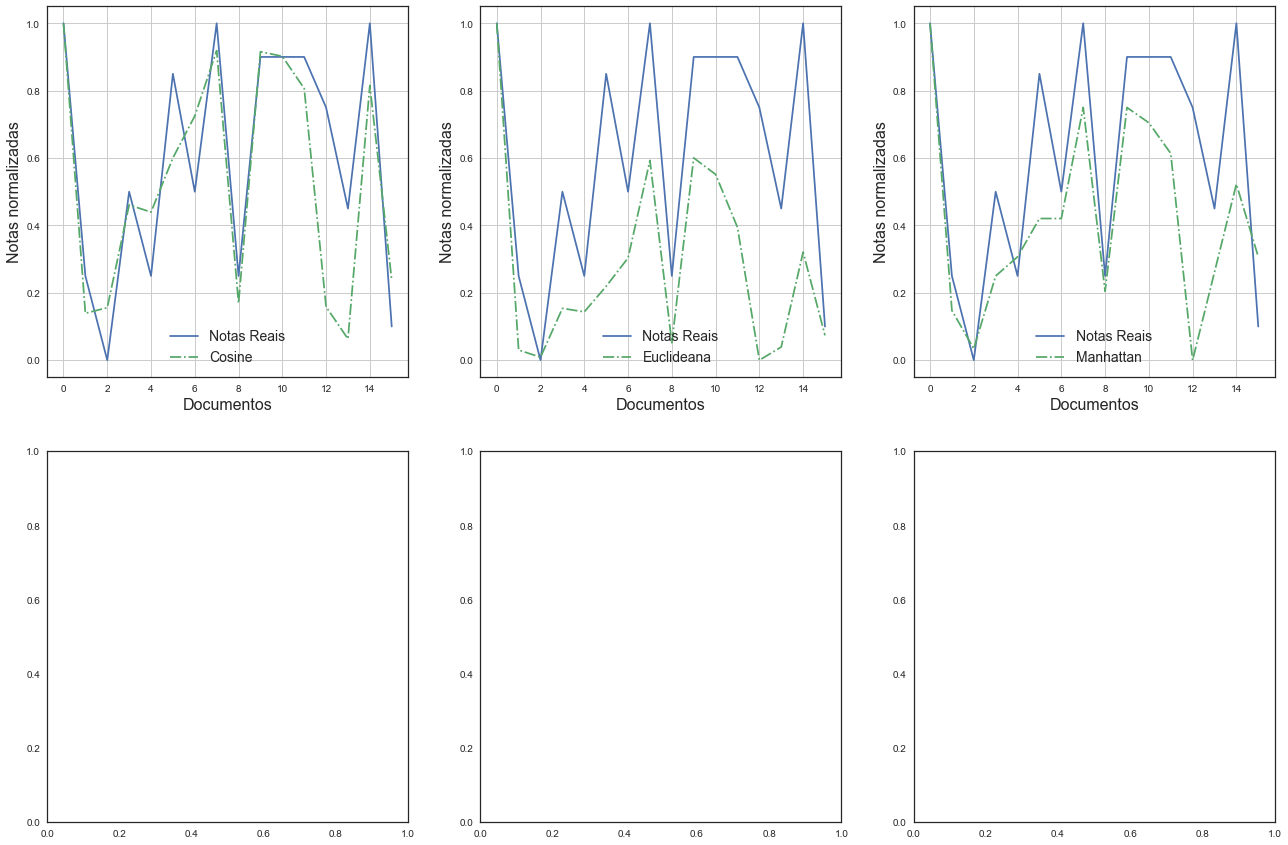

In [18]:
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(2,3, figsize=(22,15))

plt.subplot(2,3,1)
plt.plot(dfMerged['NotasNorm'].tolist(),label="Notas Reais")
plt.plot(dfMerged['Cosine'].tolist(),label="Cosine",linestyle='-.')

plt.grid(True)
plt.xlabel("Documentos",fontsize=16)
plt.ylabel("Notas normalizadas",fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2,3,2)
plt.plot(dfMerged['NotasNorm'].tolist(),label="Notas Reais")
plt.plot(dfMerged['EuclideanNorm'].tolist(),label="Euclideana",linestyle='-.')

plt.grid(True)
plt.xlabel("Documentos",fontsize=16)
plt.ylabel("Notas normalizadas",fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2,3,3)
plt.plot(dfMerged['NotasNorm'].tolist(),label="Notas Reais")
plt.plot(dfMerged['ManhattanNorm'].tolist(),label="Manhattan",linestyle='-.')

plt.grid(True)
plt.xlabel("Documentos",fontsize=16)
plt.ylabel("Notas normalizadas",fontsize=16)
plt.legend(fontsize=14)


plt.show()




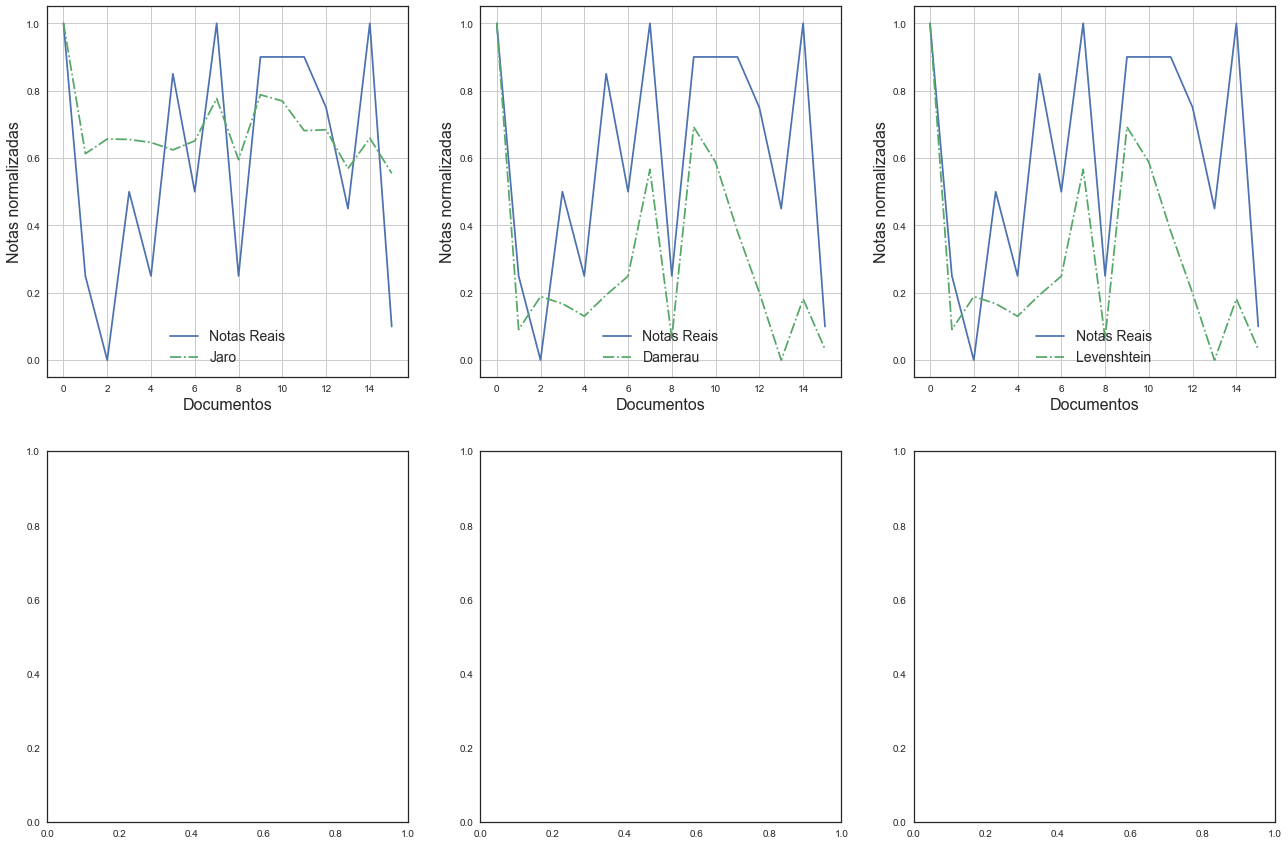

In [19]:
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(2,3, figsize=(22,15))
'''
plt.plot(dfMerged['NotasNorm'].tolist(),label="Notas Reais")
plt.plot(dfMerged['Cosine'].tolist(),label="Cosine")

plt.grid(True)
plt.xlabel("Documentos")
plt.ylabel("Notas normalizadas")
plt.legend()
plt.show()
'''
plt.subplot(2,3,1)
plt.plot(dfMerged['NotasNorm'].tolist(),label="Notas Reais")
plt.plot(dfMerged['Jaro'].tolist(),label="Jaro",linestyle='-.')

plt.grid(True)
plt.xlabel("Documentos",fontsize=16)
plt.ylabel("Notas normalizadas",fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2,3,2)
plt.plot(dfMerged['NotasNorm'].tolist(),label="Notas Reais")
plt.plot(dfMerged['DemerauNorm'].tolist(),label="Damerau",linestyle='-.')

plt.grid(True)
plt.xlabel("Documentos",fontsize=16)
plt.ylabel("Notas normalizadas",fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2,3,3)
plt.plot(dfMerged['NotasNorm'].tolist(),label="Notas Reais")
plt.plot(dfMerged['LevenshteinNorm'].tolist(),label="Levenshtein",linestyle='-.')

plt.grid(True)
plt.xlabel("Documentos",fontsize=16)
plt.ylabel("Notas normalizadas",fontsize=16)
plt.legend(fontsize=14)


plt.show()

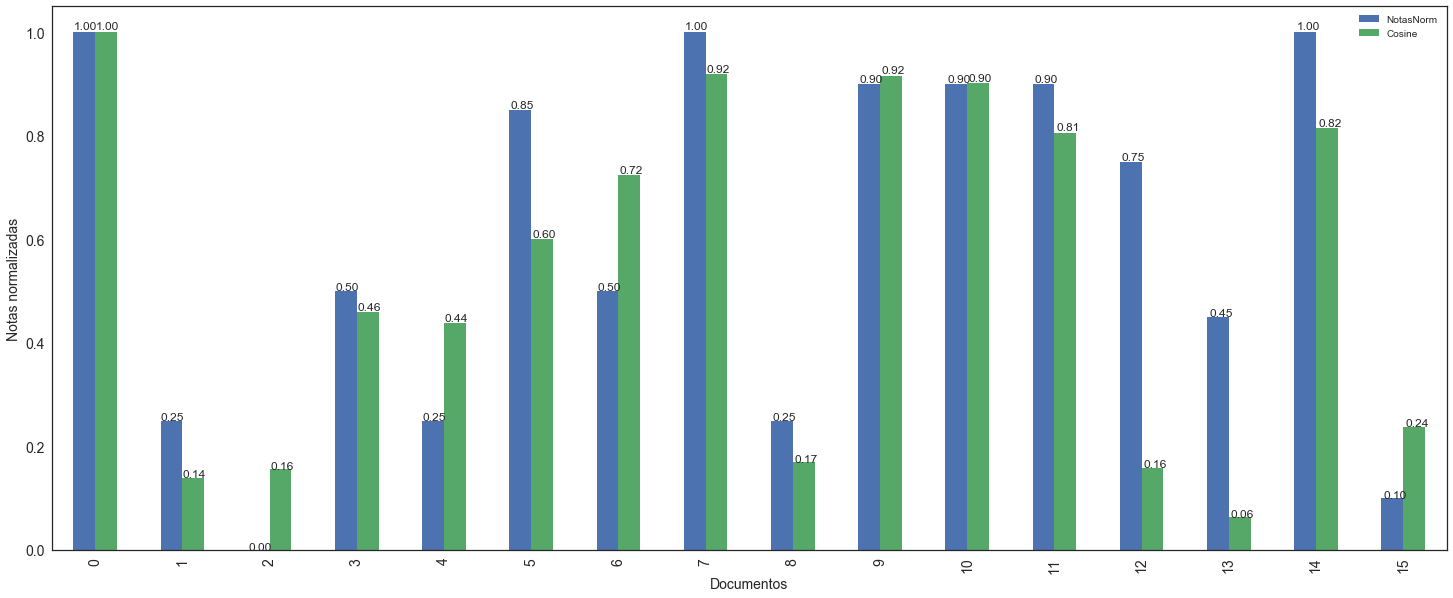

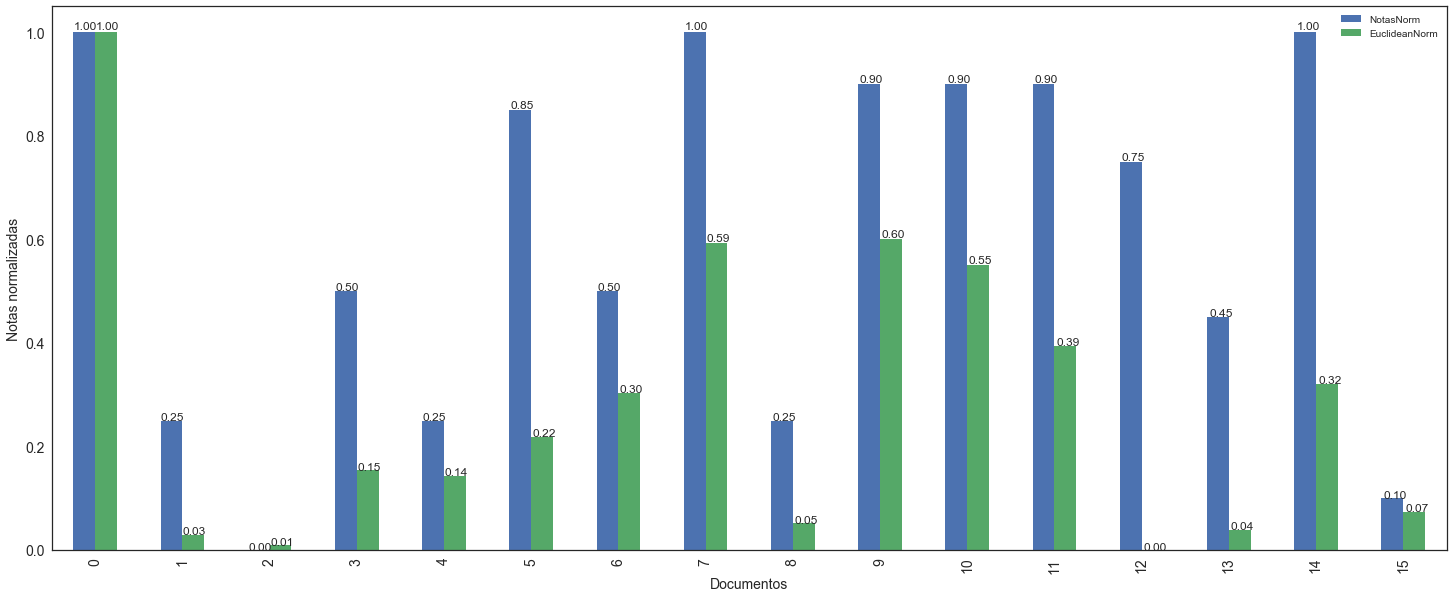

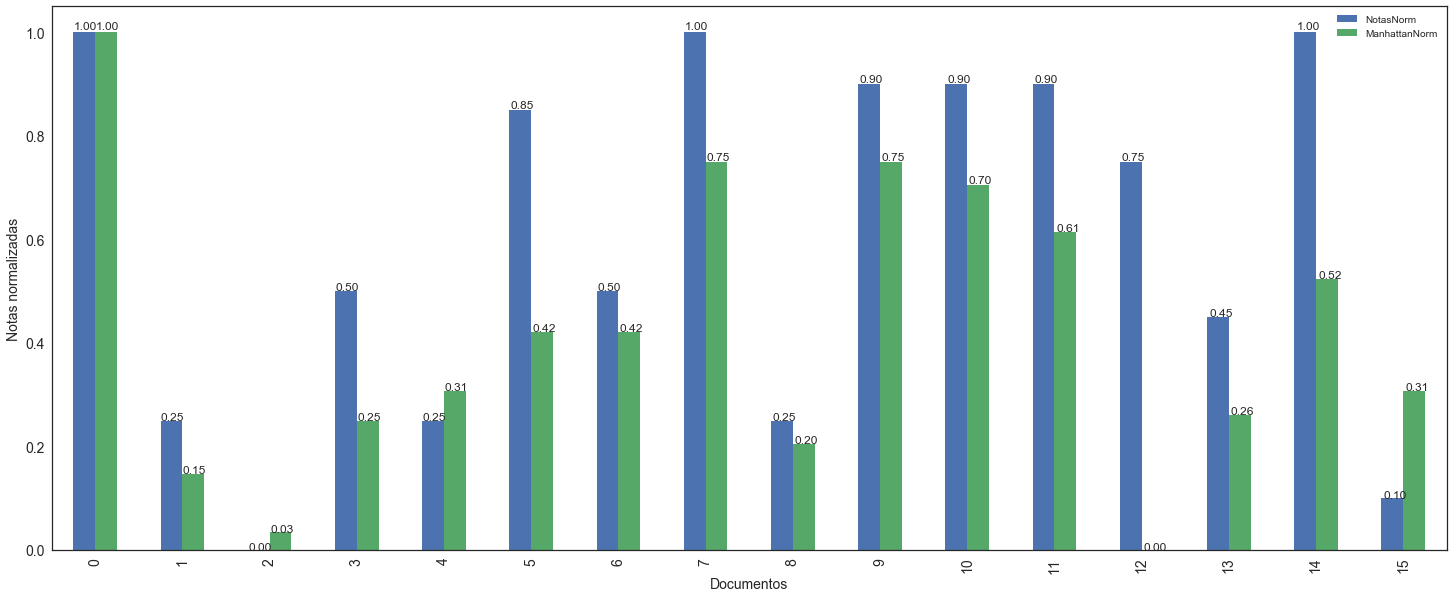

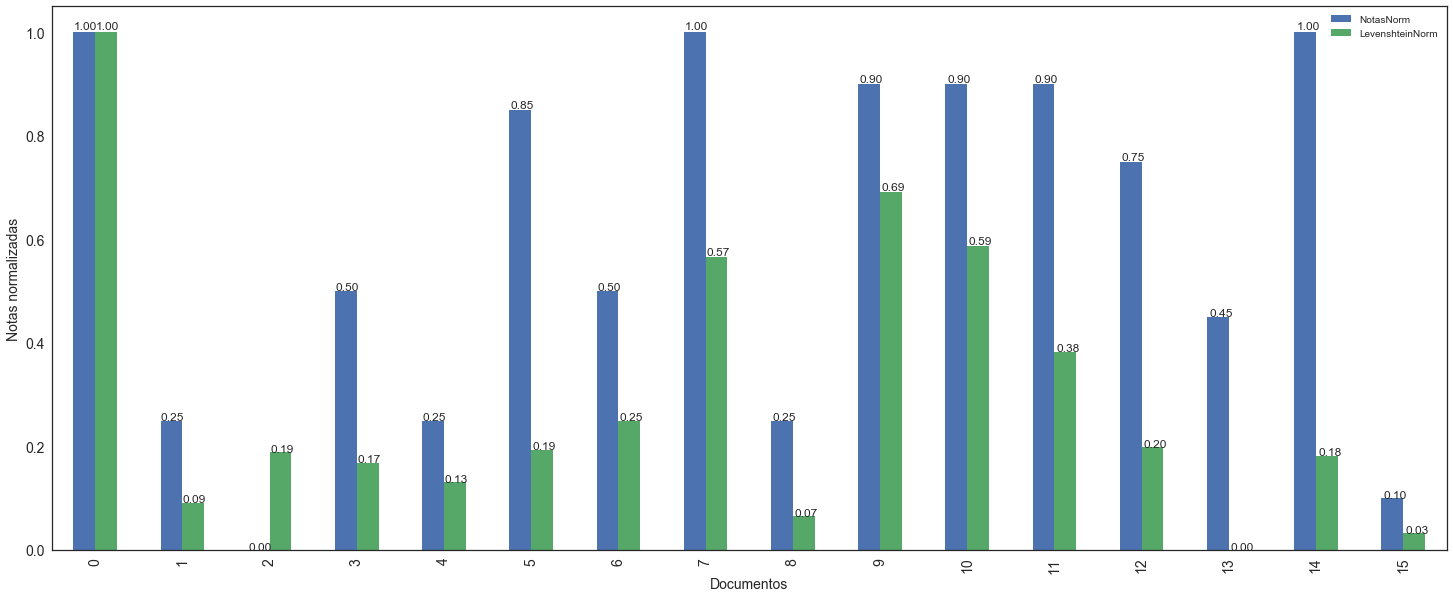

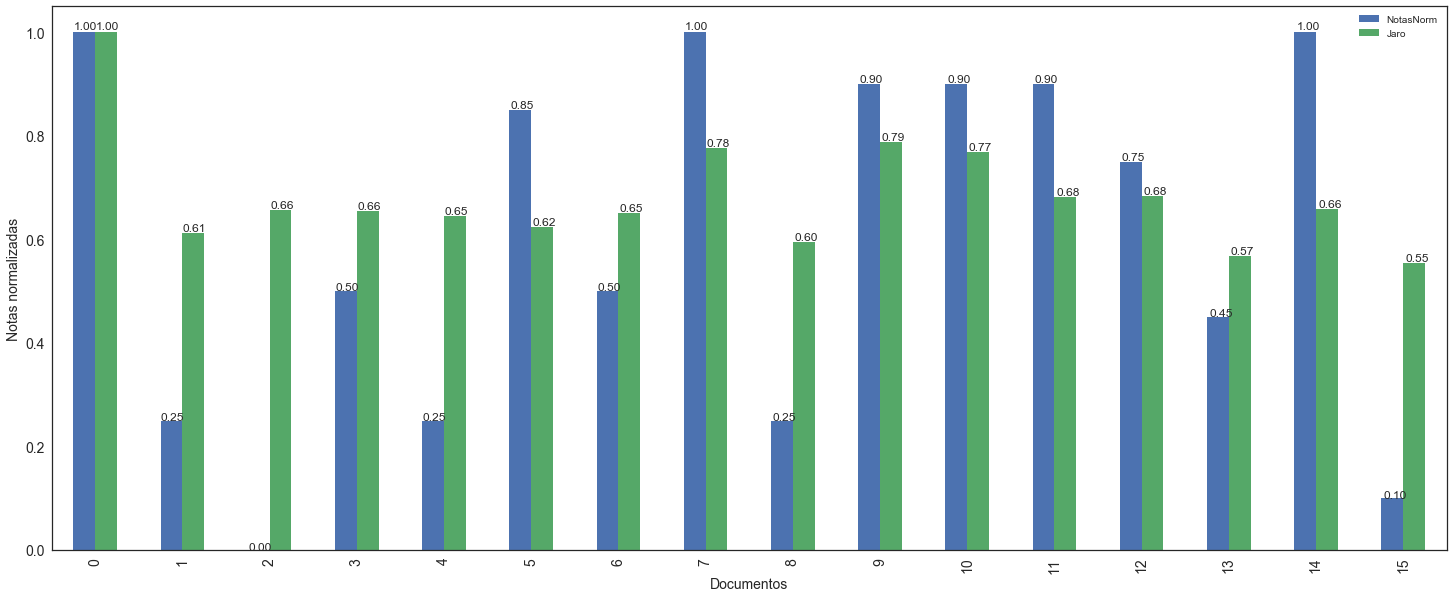

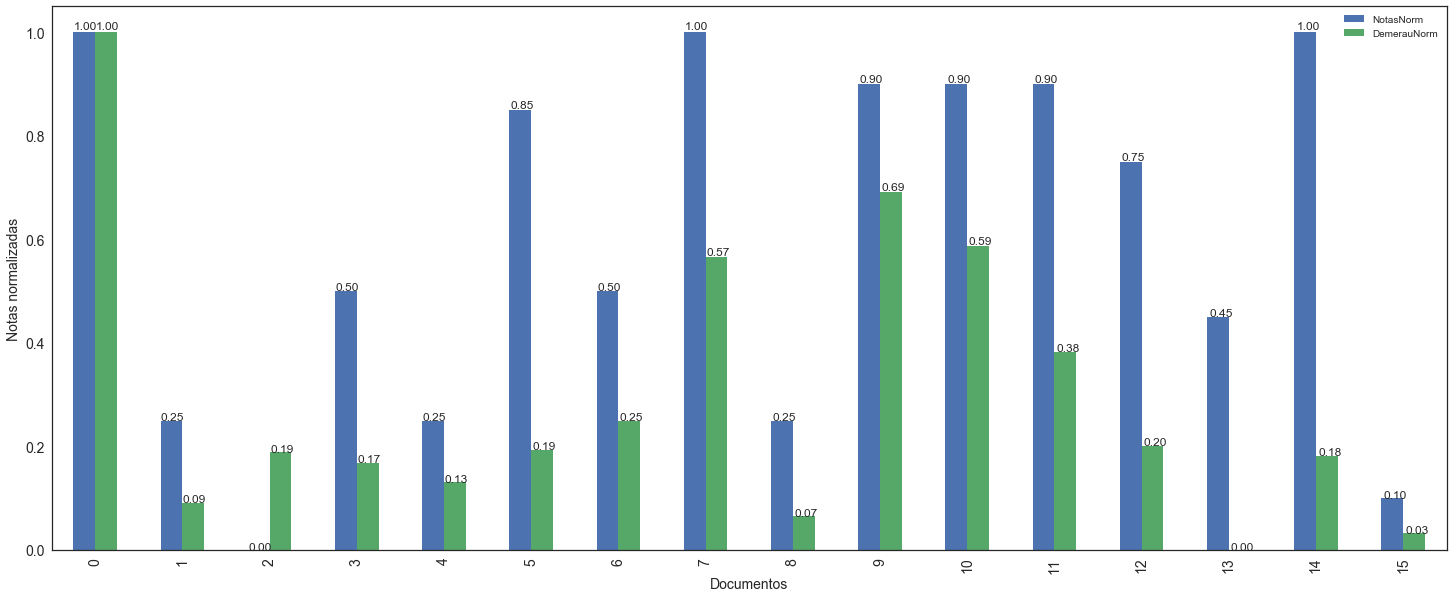

In [20]:

#########COSINE
#ax1 = dfMerged[['NotasNorm','Cosine']].plot(kind='bar', figsize=(25, 10), legend=True, fontsize=14)
ax1 = dfMerged[['NotasNorm','Cosine']].plot(kind='bar', figsize=(25, 10), legend=True, fontsize=14)
#Imprimir valores no barra 
for p in ax1.patches:
    ax1.annotate("%.2f"%float(p.get_height()), (p.get_x() * 1.002, p.get_height() * 1.005))
    
ax1.set_xlabel("Documentos", fontsize=14)
ax1.set_ylabel("Notas normalizadas", fontsize=14)



#######EUCLIDEAN
#ax2 = dfMerged[['NotasNorm','EuclideanNorm']].plot(kind='bar', figsize=(25, 10), legend=True, fontsize=14)
ax2 = dfMerged[['NotasNorm','EuclideanNorm']].plot(kind='bar', figsize=(25, 10), legend=True, fontsize=14)
#Imprimir valores no barra 
for p in ax2.patches:
    ax2.annotate("%.2f"%float(p.get_height()), (p.get_x() * 1.002, p.get_height() * 1.005))
    
ax2.set_xlabel("Documentos", fontsize=14)
ax2.set_ylabel("Notas normalizadas", fontsize=14)


### MANHATTAN
ax3 = dfMerged[['NotasNorm','ManhattanNorm']].plot(kind='bar', figsize=(25, 10), legend=True, fontsize=14)
#Imprimir valores no barra 
for p in ax3.patches:
    ax3.annotate("%.2f"%float(p.get_height()), (p.get_x() * 1.002, p.get_height() * 1.005))
    
ax3.set_xlabel("Documentos", fontsize=14)
ax3.set_ylabel("Notas normalizadas", fontsize=14)

###LevenshteinNorm
ax4 = dfMerged[['NotasNorm','LevenshteinNorm']].plot(kind='bar', figsize=(25, 10), legend=True, fontsize=14)

#Imprimir valores no barra 
for p in ax4.patches:
    ax4.annotate("%.2f"%float(p.get_height()), (p.get_x() * 1.002, p.get_height() * 1.005))
    
ax4.set_xlabel("Documentos", fontsize=14)
ax4.set_ylabel("Notas normalizadas", fontsize=14)


###JARO
ax5 = dfMerged[['NotasNorm','Jaro']].plot(kind='bar', figsize=(25, 10), legend=True, fontsize=14)

#Imprimir valores no barra 
for p in ax5.patches:
    ax5.annotate("%.2f"%float(p.get_height()), (p.get_x() * 1.002, p.get_height() * 1.005))
    
ax5.set_xlabel("Documentos", fontsize=14)
ax5.set_ylabel("Notas normalizadas", fontsize=14)

###DEMERAU
ax6 = dfMerged[['NotasNorm','DemerauNorm']].plot(kind='bar', figsize=(25, 10), legend=True, fontsize=14)

#Imprimir valores no barra 
for p in ax6.patches:
    ax6.annotate("%.2f"%float(p.get_height()), (p.get_x() * 1.002, p.get_height() * 1.005))
    
ax6.set_xlabel("Documentos", fontsize=14)
ax6.set_ylabel("Notas normalizadas", fontsize=14)

plt.show()

### Salvar DataFrame para Excel

In [21]:
from pandas import ExcelWriter

writer = ExcelWriter(path_resultados+'/ic_5gram.xlsx')
dfMerged.to_excel(writer,'Sheet5')
writer.save()

In [22]:
'''
import scipy.stats as stats
import matplotlib.pyplot as plt

h = dfMerged['Cosine'].tolist()  #sorted
e = dfMerged['Notas'].tolist()
print(e)
e = normalize(e)
e=e.tolist()
e.sort()

print(e)
h.sort()
e.sort()

hmean = np.mean(h)
emean = np.mean(e)

hstd = np.std(h)
estd = np.std(e)

pdf = stats.norm.pdf(h, hmean, hstd)
epdf = stats.norm.pdf(e, emean, estd)

plt.plot(e, pdf) 
plt.plot(h, pdf) 

plt.show()
'''

"\nimport scipy.stats as stats\nimport matplotlib.pyplot as plt\n\nh = dfMerged['Cosine'].tolist()  #sorted\ne = dfMerged['Notas'].tolist()\nprint(e)\ne = normalize(e)\ne=e.tolist()\ne.sort()\n\nprint(e)\nh.sort()\ne.sort()\n\nhmean = np.mean(h)\nemean = np.mean(e)\n\nhstd = np.std(h)\nestd = np.std(e)\n\npdf = stats.norm.pdf(h, hmean, hstd)\nepdf = stats.norm.pdf(e, emean, estd)\n\nplt.plot(e, pdf) \nplt.plot(h, pdf) \n\nplt.show()\n"

Metodologia para validação dos resultados
====
*  A validação (real vs simulado) foi conduzida pelo Teste T. Os pressupostos do Teste T foram verificados antes da análise
* Passos:
    1. As duas amostrs devem ter distribuição normal
        - Shapiro-Wilk: The Shapiro-Wilk normality test is reputadely more well suited to smaller datasets.
    2. As duas amostras devem ter mesma variância
        - Pode-se utilizar o teste F para verificar as variâncias
    3. As duas amostras devem ser independentes.
        - observação do gráfico de dispersão ou coeficiente de correlação pearson.


### Verificar graficamente se as amostras possuem distribuição normal

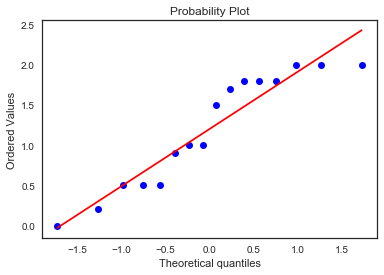

In [23]:
import numpy as np 
import pylab 
import scipy.stats as stats

notas=[]
n=0
for index,row in dfMerged.iterrows(): #Respostas
    if (type(row['Notas']) is str):
        n=float(row['Notas'].replace(',','.'))#="0"#(row['Notas']).replace(',','.')
    else:
        n=row['Notas']
    notas.append(n)    
dfMerged['Notas']=notas        


stats.probplot(notas, dist="norm", plot=pylab)
pylab.show()

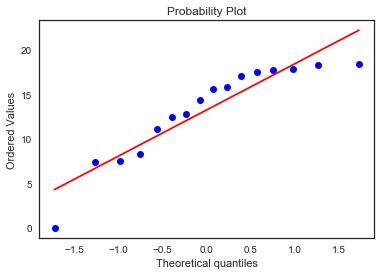

In [24]:
#DIST EUCLIDEANA

stats.probplot(dfMerged['Euclidean'], dist="norm", plot=pylab)
pylab.show()

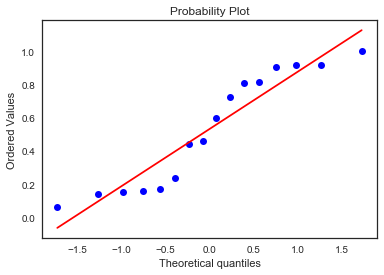

In [25]:
#DIST COSINE

stats.probplot(dfMerged['Cosine'], dist="norm", plot=pylab)
pylab.show()

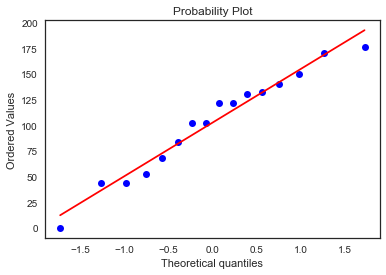

In [26]:
stats.probplot(dfMerged['Manhattan'], dist="norm", plot=pylab)
pylab.show()


### Shapiro-Wilk
#### Verifica se os dados possuem distribuição normal


Em geral, para um teste de normalidade, estamos testando a **hipótese nula** de que nossos dados 1D são amostrados de uma população que **possui uma distribuição normal**. Assumimos um nível de significância de 0.05 ou 95% para nossos testes, a menos que seja indicado de outra forma.
O teste de normalidade Shapiro-Wilk é mais adequado para conjuntos de dados menores.
Como nosso valor p é muito menor do que nossa estatística de teste, temos boas evidências para não rejeitar a hipótese nula no nível de significância de 0,05.

In [27]:
"""
init_notebook_mode(connected=True)
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
from plotly.graph_objs import Scatter, Figure, Layout
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import scipy
from plotly.graph_objs import Scatter, Figure, Layout

def sw_table(amostra):
    shapiro_results = scipy.stats.shapiro(amostra)
    
    matrix_sw = [
        ['', 'DF', 'Test Statistic', 'p-value'],
        ['Sample Data', len(amostra) - 1, shapiro_results[0], shapiro_results[1]]
    ]

    shapiro_table = ff.create_table(matrix_sw, index=True)
    iplot(shapiro_table, filename='shapiro-table')
"""    

"\ninit_notebook_mode(connected=True)\nfrom plotly import __version__\nfrom plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot \nfrom plotly.graph_objs import Scatter, Figure, Layout\nimport plotly.figure_factory as ff\n\nimport numpy as np\nimport pandas as pd\nimport scipy\nfrom plotly.graph_objs import Scatter, Figure, Layout\n\ndef sw_table(amostra):\n    shapiro_results = scipy.stats.shapiro(amostra)\n    \n    matrix_sw = [\n        ['', 'DF', 'Test Statistic', 'p-value'],\n        ['Sample Data', len(amostra) - 1, shapiro_results[0], shapiro_results[1]]\n    ]\n\n    shapiro_table = ff.create_table(matrix_sw, index=True)\n    iplot(shapiro_table, filename='shapiro-table')\n"

In [28]:
# Notas
#sw_table(dfMerged['Notas'])

In [29]:
# Euclidean
#sw_table(dfMerged['Euclidean'])

In [30]:
# Cosine
#sw_table(dfMerged['Cosine'])

In [31]:
# Manhatthan
#sw_table(dfMerged['Manhattan'])

### Kolmogorov-Smirnov
Como nosso p-valor é lido como 0.0 (significando que é "praticamente" 0 dada a precisão decimal do teste), então temos fortes evidências para não rejeitar a hipótese nula

In [32]:
def ks_table(amostra):
    ks_results = scipy.stats.kstest(amostra, cdf='norm')

    matrix_ks = [
        ['', 'DF', 'Test Statistic', 'p-value'],
        ['Sample Data', len(amostra) - 1, ks_results[0], ks_results[1]]
    ]

    ks_table = ff.create_table(matrix_ks, index=True)
    iplot(ks_table, filename='ks-table')

In [33]:
# Notas
#ks_table(dfMerged['Notas'])

In [34]:
# Euclidean
#ks_table(dfMerged['Euclidean'])

In [35]:
# Cosine
#ks_table(dfMerged['Cosine'])

In [36]:
# Manhatthan
#ks_table(dfMerged['Manhattan'])

### Calculando a variância das amostras

In [37]:
import numpy as np
columns=['NotasNorm','EuclideanNorm','Cosine','ManhattanNorm','Jaro','DemerauNorm','LevenshteinNorm']
metrics=[]
for c in columns:
    metrics.append([c,np.var([dfMerged[c]],dtype=np.float64)])
print(metrics)

[['NotasNorm', 0.11593750000000001], ['EuclideanNorm', 0.07582412653095491], ['Cosine', 0.10852300247195762], ['ManhattanNorm', 0.07554588633135331], ['Jaro', 0.011106700914291319], ['DemerauNorm', 0.07253697460756027], ['LevenshteinNorm', 0.07256501268739031]]


T-student
=====
o teste t de Student pode ser utilizado para avaliar se há diferença significativa entre as médias de duas amostras
> Entrada: duas amostras
> Saída: dois valores onde
* O primeiro valor corresponde ao valor T 
* e o segundo corresponde ao valor p (two-tailed).

In [38]:
from scipy import stats
res = []
for c in columns:
    t=stats.ttest_ind(dfMerged['NotasNorm'],dfMerged[c])
    res.append([c,t[0],t[1]])
    #print(c,"\t:",stats.ttest_ind(dfMerged['NotasNorm'],dfMerged[c]))
print(res)    

dfRes = pd.DataFrame(res,columns=['Amostra','TesteT','valor_p'])
print(dfRes)

writer = ExcelWriter(path_resultados+'/results_5gram.xlsx')
dfRes.to_excel(writer,'Sheet5')
writer.save()


[['NotasNorm', 0.0, 1.0], ['EuclideanNorm', 2.8284079704179863, 0.008257724361685828], ['Cosine', 0.5580350380647594, 0.5809614649087498], ['ManhattanNorm', 1.6079700866678512, 0.11831682197090983], ['Jaro', -0.8980371675241565, 0.3763168920018911], ['DemerauNorm', 2.715586708757089, 0.010868374014665762], ['LevenshteinNorm', 2.716684341746565, 0.01083961865210163]]
           Amostra    TesteT   valor_p
0        NotasNorm  0.000000  1.000000
1    EuclideanNorm  2.828408  0.008258
2           Cosine  0.558035  0.580961
3    ManhattanNorm  1.607970  0.118317
4             Jaro -0.898037  0.376317
5      DemerauNorm  2.715587  0.010868
6  LevenshteinNorm  2.716684  0.010840


MAPE
======
*Mean Absolute Percent Error (MAPE)*

O MAPE (erro médio absoluto percentual) é calculado através da diferença
entre valores estimados e reais e equivale às previsões um passo-à-frente (por
exemplo, para o ano seguinte). Matematicamente, tem-se:

quanto menor for o MAPE, melhor será a adequação do modelo, e conseqüentemente, a previsão. 

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


res = []
t=[]
for c in columns:
    t.append([c,mean_absolute_error(dfMerged['NotasNorm'].tolist(),dfMerged[c].tolist())])
    #res.append([c,t[0])
    #print(c,"\t:",stats.ttest_ind(dfMerged['NotasNorm'],dfMerged[c]))
print(t) 
print(t[2][1]) 





[['NotasNorm', 0.0], ['EuclideanNorm', 0.32091356334918686], ['Cosine', 0.15894732840641596], ['ManhattanNorm', 0.21889204545454544], ['Jaro', 0.24741586901088047], ['DemerauNorm', 0.32800116550116554], ['LevenshteinNorm', 0.32814685314685316]]
0.15894732840641596


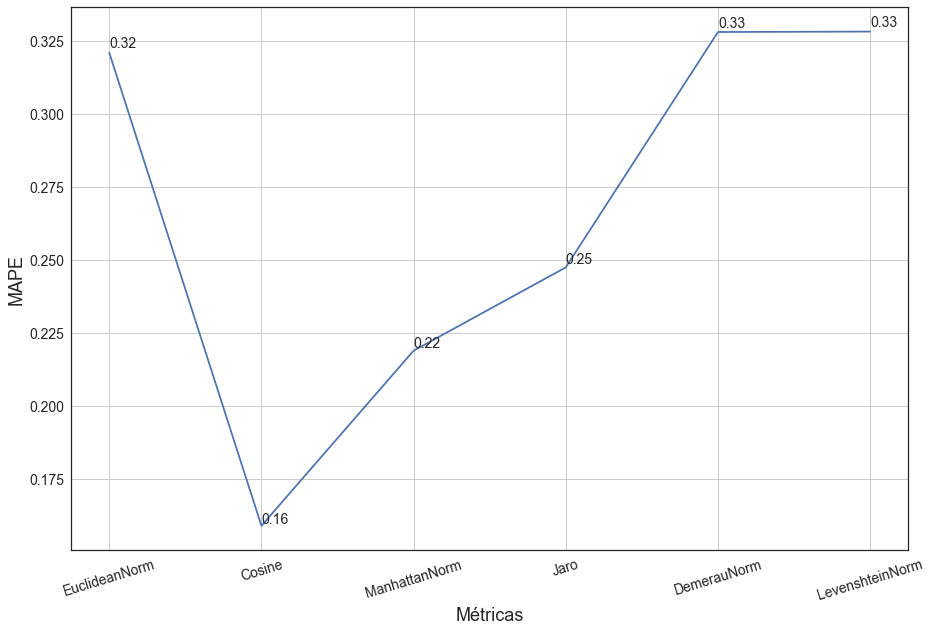

'\nplt.grid(True)\nplt.xlabel("Métricas",fontsize=16)\nplt.ylabel("MAPE",fontsize=16)\nplt.legend(fontsize=14)\nplt.show()\n'

In [185]:
##### Gráficos MAPE
from math import floor


col=['EuclideanNorm','Cosine','ManhattanNorm','Jaro','DemerauNorm','LevenshteinNorm']
i=0
val=[x[1] for x in t]
val=val[1:]
lab=[x[0] for x in t]
fig,ax = plt.subplots(1,figsize=(15,10))
ax.plot(val)

ax.tick_params(labelsize=14)
ax.grid(True)
ax.set_xticklabels(lab,fontsize=14,rotation=17)
ax.set_xlabel("Métricas",fontsize=18)
ax.set_ylabel("MAPE",fontsize=18)
label_pos=np.arange(len(lab))
#Valores no gráfico
for i,j in zip(label_pos,val):
    ax.annotate('%.2f'%j, xy=(i,j*1.005),fontsize=14)
    

plt.show()

'''
plt.grid(True)
plt.xlabel("Métricas",fontsize=16)
plt.ylabel("MAPE",fontsize=16)
plt.legend(fontsize=14)
plt.show()
'''


R-SQUARED
====
Ele é definido como 1.0 menos o quanto o modelo tem de de variância
inexplicada, representando uma medida relativa a um modelo nulo que usa
somente a média de y como o preditor.
R-squared é adimensional, e o melhor valor possível para o R-squared é 1.0
(valores pequenos ou negativos de R2 não são bons sinais).

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(real,exp)
print(r2)

res = []
for c in columns:
    t=r2_score(dfMerged['NotasNorm'].tolist(),dfMerged[c].tolist())
    res.append([c,t])
    #print(c,"\t:",stats.ttest_ind(dfMerged['NotasNorm'],dfMerged[c]))
print(res)    

#dfRes = pd.DataFrame(res,columns=['Amostra','TesteT','valor_p'])
#print(dfRes)